In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the data

In [10]:

df = pd.read_csv('/home/khalil/Desktop/power_consumption/data/modeling/power_consumption_daily.csv')
df.head(10)

,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy,dow,trend,seasonal,resid
Date_Time,,,,,,,,,,,,
2006-12-16,1209.18,34.92,93552.53,5180.80,0.00,546.00,4926.00,14680.93,5,nan,133.14,nan
2006-12-17,3390.46,226.01,345725.32,14398.60,2033.00,4187.00,13341.00,36946.67,6,nan,104.93,nan
2006-12-18,2203.83,161.79,347373.64,9247.20,1063.00,2621.00,14018.00,19028.43,0,nan,-93.56,nan
2006-12-19,1666.19,150.94,348479.01,7094.00,839.00,7602.00,6197.00,13131.90,1,2108.58,-12.01,-430.38
2006-12-20,2225.75,161.00,348923.61,9313.00,0.00,2648.00,14063.00,20384.80,2,2617.75,-8.96,-383.04
2006-12-21,1723.29,144.43,347096.41,7266.40,1765.00,2692.00,10456.00,13808.47,3,2497.68,-85.26,-689.14
2006-12-22,2341.34,186.91,347305.75,9897.00,3151.00,350.00,11131.00,24390.30,4,2574.73,-38.30,-195.09
2006-12-23,4773.39,221.47,345795.95,20200.40,2669.00,425.00,14726.00,61736.43,5,2898.71,133.14,1741.53
2006-12-24,2550.01,149.90,348029.91,11002.20,1703.00,5082.00,6891.00,28824.20,6,2799.14,104.93,-354.07


In [8]:
# set the datetime column as the index
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.set_index('Date_Time', inplace=True)
df.head(10)

,active_power,reactive_power,voltage,current_intensty,active_energy_kitchen,active_energy_laundry,active_energy_ac,other_active_energy,dow,trend,seasonal,resid
Date_Time,,,,,,,,,,,,
2006-12-16,1209.18,34.92,93552.53,5180.80,0.00,546.00,4926.00,14680.93,5,nan,133.14,nan
2006-12-17,3390.46,226.01,345725.32,14398.60,2033.00,4187.00,13341.00,36946.67,6,nan,104.93,nan
2006-12-18,2203.83,161.79,347373.64,9247.20,1063.00,2621.00,14018.00,19028.43,0,nan,-93.56,nan
2006-12-19,1666.19,150.94,348479.01,7094.00,839.00,7602.00,6197.00,13131.90,1,2108.58,-12.01,-430.38
2006-12-20,2225.75,161.00,348923.61,9313.00,0.00,2648.00,14063.00,20384.80,2,2617.75,-8.96,-383.04
2006-12-21,1723.29,144.43,347096.41,7266.40,1765.00,2692.00,10456.00,13808.47,3,2497.68,-85.26,-689.14
2006-12-22,2341.34,186.91,347305.75,9897.00,3151.00,350.00,11131.00,24390.30,4,2574.73,-38.30,-195.09
2006-12-23,4773.39,221.47,345795.95,20200.40,2669.00,425.00,14726.00,61736.43,5,2898.71,133.14,1741.53
2006-12-24,2550.01,149.90,348029.91,11002.20,1703.00,5082.00,6891.00,28824.20,6,2799.14,104.93,-354.07


# Feature Engineering

In [12]:
df_active_p = df[['active_power']]
for i in range(1, 8):
    df_active_p['shift_'+str(i)] = df_active_p['active_power'].shift(i)
df_active_p

/home/khalil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,active_power,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7
Date_Time,,,,,,,,
2006-12-16,1209.18,nan,nan,nan,nan,nan,nan,nan
2006-12-17,3390.46,1209.18,nan,nan,nan,nan,nan,nan
2006-12-18,2203.83,3390.46,1209.18,nan,nan,nan,nan,nan
2006-12-19,1666.19,2203.83,3390.46,1209.18,nan,nan,nan,nan
2006-12-20,2225.75,1666.19,2203.83,3390.46,1209.18,nan,nan,nan
2006-12-21,1723.29,2225.75,1666.19,2203.83,3390.46,1209.18,nan,nan
2006-12-22,2341.34,1723.29,2225.75,1666.19,2203.83,3390.46,1209.18,nan
2006-12-23,4773.39,2341.34,1723.29,2225.75,1666.19,2203.83,3390.46,1209.18
2006-12-24,2550.01,4773.39,2341.34,1723.29,2225.75,1666.19,2203.83,3390.46


In [13]:
# Handle Missing Values
df_active_p = df_active_p.dropna()

In [14]:
# feature engineering
X_columns = [x for x in df_active_p.columns if x != 'active_power']
y_column = ['active_power']

In [19]:
# data split

threshold = 0.9
absolute_threshold = int(len(df_active_p)*threshold)
print(len(df_active_p), absolute_threshold)

X_train = df_active_p.iloc[:absolute_threshold][X_columns]
y_train = df_active_p.iloc[:absolute_threshold][y_column]

X_test = df_active_p.iloc[absolute_threshold:][X_columns]
y_test = df_active_p.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

1450 1305
X_train (1305, 7)
y_train (1305, 1)
X_test (145, 7)
y_test (145, 1)


In [20]:
# Train a linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
# Calculate the MAE
from sklearn.metrics import mean_absolute_error
print('MAE', mean_absolute_error(y_test, y_pred))

MAE 396.17297334569514


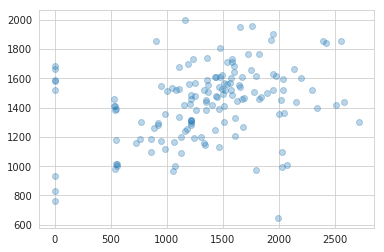

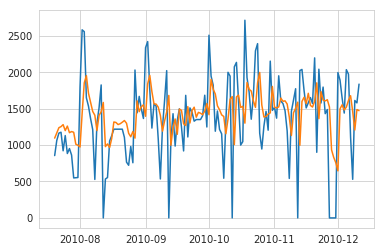

In [22]:
# plot the results
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.show()

In [106]:
df_power = df[['active_power', 'dow', 'trend', 'resid']]
# for i in range(1, 15):
#     df_power['active_power_shift_'+str(i)] = df_power['active_power'].shift(i)
#     df_power['reactive_power_shift_'+str(i)] = df_power['reactive_power'].shift(i)
#     df_power['active_energy_kitchen'+str(i)] = df_power['active_energy_kitchen'].shift(i)
#     df_power['active_energy_laundry'+str(i)] = df_power['active_energy_laundry'].shift(i)
#     df_power['active_energy_ac'+str(i)] = df_power['active_energy_ac'].shift(i)
#     #df_power['active_energy_kitchen'+str(i)] = df_power['active_energy_kitchen'].shift(i)
# 'reactive_power', 'active_energy_kitchen','active_energy_laundry', 'active_energy_ac'

df_power

# Handle Missing Values
df_power = df_power.dropna()

# feature engineering
X_columns = [x for x in df_power.columns if x != 'active_power']
y_column = ['active_power']
print(X_columns)

# split the data

threshold = 0.9
absolute_threshold = int(len(df_power)*threshold)
print(len(df_power), absolute_threshold)

X_train = df_power.iloc[:absolute_threshold][X_columns]
y_train = df_power.iloc[:absolute_threshold][y_column]

X_test = df_power.iloc[absolute_threshold:][X_columns]
y_test = df_power.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

['dow', 'trend', 'resid']
1451 1305
X_train (1305, 3)
y_train (1305, 1)
X_test (146, 3)
y_test (146, 1)


In [107]:
df_power.head()

,active_power,dow,trend,resid
Date_Time,,,,
2006-12-19,1666.19,1,2108.58,-430.38
2006-12-20,2225.75,2,2617.75,-383.04
2006-12-21,1723.29,3,2497.68,-689.14
2006-12-22,2341.34,4,2574.73,-195.09
2006-12-23,4773.39,5,2898.71,1741.53


MAE 44.45554367023248
RMSE 53.65


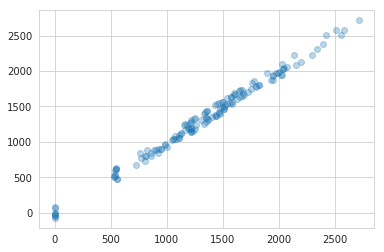

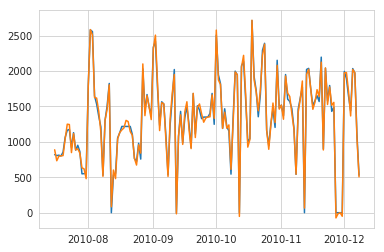

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE', mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 2))

# plot the results
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.show()